## Sobre os dataset

Decidi deixar o ano de 2025 de fora. Apesar da bem atualizado achei melhor focar apenas nos dados "redondo", com os ano completo.
(Surpreendentemente, dados faltantes de menos de 1 mês - na data de criação do algorito a última entrada é '2025-10-31').  

In [1]:
!pip install kmodes -q
!pip install folium -q

In [2]:
# Cell 0. Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pickle

import matplotlib.pyplot as plt

## Load Data

In [3]:
# Cell 1. Schema Definition

schema_old = {
    
    'id': 			'Int64',
    'br': 			'Int64',
    'ano': 			'Int64',
    'pessoas': 		'Int64',
    'mortos': 		'Int64',
    'ilesos': 		'Int64',
    'ignorados': 	'Int64',
    'feridos': 		'Int64',
    'veiculos': 	'Int64',
    'feridos_leves':'Int64',
    'feridos_graves':'Int64',
    
    'km': 			'float64',
    
	'data_inversa': 'string',
    'horario': 		'string',
    
	'dia_semana': 	'category',
    'uf': 			'category',
	'municipio': 	'category',
    'fase_dia': 	'category',
    'sentido_via':	'category',
    'tipo_pista': 	'category',
    'tracado_via':	'category',
    'uso_solo': 	'category',
	'tipo_acidente':	'category',
	'causa_acidente':	'category',
    'classificacao_acidente': 'category',
    'condicao_metereologica': 'category',

}


schema_new = {
    
	'id': 			'Int64',
    'br': 			'Int64',
    'ano': 			'Int64',
    'pessoas': 		'Int64',
    'mortos': 		'Int64',
    'ilesos': 		'Int64',
    'ignorados': 	'Int64',
    'feridos': 		'Int64',
    'veiculos': 	'Int64',
    'feridos_leves':'Int64',
    'feridos_graves':'Int64',
    
    'km': 			'float64',
    
    'latitude':		'object',
	'longitude':	'object',
    'uso_solo': 	'object',
    
	'data_inversa': 'string',
    'horario': 		'string',
    
	'dia_semana': 	'category',
    'uf': 			'category',
	'municipio': 	'category',
    'fase_dia': 	'category',
    'sentido_via':	'category',
    'tipo_pista': 	'category',
    'tracado_via':	'category',
    'regional':		'category',
    'delegacia':	'category',
    'uop':			'category',
	'tipo_acidente':	'category',
	'causa_acidente':	'category',
    'classificacao_acidente': 'category',
    'condicao_metereologica': 'category',
    
}

In [4]:
# Cell 2. Load Data from PRF (Polícia Rodoviária Federal)

PATH_DATAS = "../arquivos_prf/csv/"

def load_prf_data_period( years ):
	"""
	Load and joins datas about accident reports from PRF for the given years based on schema
	Ex: years = [7, 8, 9] for 2007, 2008, 2009
	"""

	dfs = []
	custom_nulls = ["", " ", "NA", "N/A", "NULL", "(null)", None]

	for year in years:

		year_str = f"{year:02d}"	# Format to two digits

		file = f"{PATH_DATAS}datatran20{year_str}.csv"

		if os.path.exists( file ):

			try:

				df = pd.read_csv(

					file,
					sep = ";",
					encoding = "latin1",
					na_values = custom_nulls,							# Define custom null values
					dtype 	= schema_old if year < 17 else schema_new,	# Define schema based on year
					decimal = "." if year < 16 else ",",				# Define decimal based on year - Note: 2016, decimal is comma
					low_memory = False

				)

				# For new schema, convert latitude and longitude to float
				cols_to_float = ['latitude', 'longitude']

				for col in cols_to_float:

					if col in df.columns:
						
						df[col] = (

							df[col].astype(str)								# Convert to string first
							.str.replace(",", ".", regex = False)			# Replace comma with dot
							.str.replace("(null)", 'nan', regex = False)	# Replace (null) with nan

						)

						df[col] = pd.to_numeric( df[col], errors = 'coerce' )	# Convert to numeric, setting errors to NaN
				
				df['ano_base'] = 2000 + year						# Add auxiliar year column
				df['ano_base'] = df['ano_base'].astype( 'Int64' )	# Set type to Int64
				dfs.append( df )									# Append to list

			except Exception as e:

				print(f"Error: {e}")

		else:

			print(f"File {file} not found!")
			continue
	
	if dfs:
		return pd.concat( dfs, ignore_index = True )	# Concatenate all dataframes to return
	
	else:
		return None
	
def view_df(  df, name ):
	"""
	View basic information about dataframe
	"""
	print(f"{name} head: \n{df.head().T}")
	print(f"\n{'-' * 30}\n")
	print(f"{name} tail:\n{df.tail().T}")
	print(df.info())

	print(f"\n{'#' * 50}\n")

In [5]:
# Cell 3. Load Data for Old and New Periods

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 30)

old_years = list( range(7 , 17) ) # From 2007 to 2016
new_years = list( range(17, 25) ) # From 2017 to 2024

# old_years = list( range(16, 17) ) # Just 2016
# new_years = list( range(24, 25) ) # Just 2024

print(f"\n* Loading data from {old_years[0]+2000} to {old_years[-1]+2000}")
df_old = load_prf_data_period( old_years )

print(f"\n* Loading data from {new_years[0]+2000} to {new_years[-1]+2000}")
df_new = load_prf_data_period( new_years )

# Drop id
df_old = df_old.drop('id', axis=1 )
df_new = df_new.drop('id', axis=1 )

print(df_old)

view_df( df_old, "Old Data Sample" )
view_df( df_new, "New Data Sample" )


* Loading data from 2007 to 2016

* Loading data from 2017 to 2024
        data_inversa dia_semana   horario  uf   br      km           municipio               causa_acidente            tipo_acidente classificacao_acidente  ...   ano pessoas mortos feridos_leves feridos_graves ilesos  ignorados  feridos  veiculos  ano_base
0         11/06/2007    Segunda  15:30:00  MG  381   623.2            OLIVEIRA             Falta de atenção          Colisão frontal                    NaN  ...  2007       9      0             4              0      5          0        4         6      2007
1         11/06/2007    Segunda  15:30:00  MG  381   623.2            OLIVEIRA             Falta de atenção          Colisão frontal                    NaN  ...  2007       9      0             4              0      5          0        4         6      2007
2         13/08/2007    Segunda  14:25:00  MG   40   585.5           ITABIRITO                       Outras           Saída de Pista    Com Vítimas Feridas  .

## Data Processing

In [6]:
# Cell 4. Data Overview and Processing

def initial_overview( df, name ):
	"""
	Show a basic overview of the dataframe including shape, null values percentage, and duplicates.
	"""
    
	print(f"\n* Data Overview for {name} Period:")
	print(f"Lines: {df.shape[0]} | Columns: {df.shape[1]}")

	# Null Values %
	nulls = df.isnull().sum() / len(df) * 100								# Calculate null percentages
	relevant_nulls = nulls[ nulls > 0 ].sort_values( ascending = False )	# Filter only relevant nulls 

	if not relevant_nulls.empty:

		print("\nColumns with Null Values (%):")
		print( relevant_nulls.head(10) ) 			# Show top 10 columns with nulls

	else:
		print("\nNo columns with null values.")

	# Verify Duplicates
	duplicates = df.duplicated().sum()
	print(f"\nNumber of Duplicate Rows: {duplicates}")

	print(f"\n{'-' * 40}\n")

def stand_text( df, columns ):
	"""
	Standardizes text columns by stripping whitespace and converting to title.
	"""
	
	df_clean = df.copy()

	stats = {

		'processed_columns': [],
		'total_modifications': 0,
		'modifications_per_column': {}

	}

	for col in df_clean.columns:

		if col in columns:

			original_values = df_clean[col].copy()	# Store original values for comparison

			if col == 'uf':
				
				df_clean[col] = df_clean[col].astype(str).str.strip().str.upper() 	# Standardize text to upper case

			else:

				df_clean[col] = df_clean[col].astype(str).str.strip().str.title() 	# Standardize text to title case
				modifications = (original_values != df_clean[col]).sum() 			# Count modifications

			stats['processed_columns'].append( col )
			stats['modifications_per_column'][ col ] = modifications
			stats['total_modifications'] += modifications
	
	return df_clean, stats

def adjusted_solos( df ):
	"""
	Standardizes 'uso_solo' column values from "Sim" or "Não" to "Urbano" or "Rural".
	"""

	df_clean = df.copy()

	if 'uso_solo' not in df_clean.columns:

		print("Error: Column 'uso_solo' not found in dataframe.")
		return df_clean
	
	if df_clean['ano_base'].iloc[0] >= 2017:

		mapping = { 'Sim': 'Urbano', 'sim': 'Urbano', 'Não': 'Rural', 'não': 'Rural' }				# Mapping for new schema
		
		df_clean['uso_solo'] = df_clean['uso_solo'].map( mapping ).fillna( df_clean['uso_solo'] )	# Apply mapping
		df_clean['uso_solo'] = df_clean['uso_solo'].astype( 'category' )							# Set type to category

	return df_clean

def adjusted_date_time( df ):
	"""
	Standardizes 'data_inversa' and 'horario' column to datetime format.
	"""

	df_clean = df.copy()

	# Adjust 'data_inversa' to datetime
	if 'data_inversa' in df_clean.columns:

		if df_clean['ano_base'].iloc[0] < 2017:

			if df_clean['ano_base'].iloc[0] != 2016:

				df_clean['data_inversa'] = pd.to_datetime( df_clean['data_inversa'], format = '%d/%m/%Y', errors = 'coerce' )

			else:
				df_clean['data_inversa'] = pd.to_datetime( df_clean['data_inversa'], format = '%d/%m/%y', errors = 'coerce' )

		else:
			df_clean['data_inversa'] = pd.to_datetime( df_clean['data_inversa'], format = '%Y-%m-%d', errors = 'coerce' )

	# Adjust 'horario' and join to date
	if 'horario' in df_clean.columns and 'data_inversa' in df_clean.columns:

		df_clean['horario'] = pd.to_timedelta( df_clean['horario'].astype(str), errors = 'coerce' )

		df_clean['data_hora'] = df_clean['data_inversa'] + df_clean['horario']
		df_clean['data_hora'] = pd.to_datetime( df_clean['data_hora'], errors = 'coerce' )

		cols_position = df_clean.columns.get_loc('data_inversa') + 1
		df_clean = df_clean.drop( columns = ['data_inversa', 'horario'], axis = 1 )
		df_clean.insert( cols_position, 'data_hora', df_clean.pop('data_hora') )

		print( df_clean['data_hora'].head() )

	print(f"\n{'-' * 40}\n")

	return df_clean
	
def adjusted_week_day( df ):
	"""
	Standardizes 'dia_semana' column to have consistent weekday names.
	"""

	df_clean = df.copy()

	if 'dia_semana' in df_clean.columns and df_clean['ano_base'].iloc[0] < 2017:

		df_clean['dia_semana'] = df_clean['dia_semana'].astype(str)

		weekday_mapping = {

			'Segunda':	'Segunda-feira',
			'Terça': 	'Terça-feira',
			'Quarta': 	'Quarta-feira',
			'Quinta': 	'Quinta-feira',
			'Sexta': 	'Sexta-feira',
			'Sábado': 	'Sábado',
			'Domingo': 	'Domingo',

		}

		df_clean['dia_semana'] = df_clean['dia_semana'].map( weekday_mapping ).fillna( df_clean['dia_semana'] )
		df_clean['dia_semana'] = df_clean['dia_semana'].str.strip().str.title()
		df_clean['dia_semana'] = df_clean['dia_semana'].astype( 'category' )

	return df_clean


In [7]:
# Cell 5. Initial Overview and Standardization of Old Data

cols_toStand = [ 'dia_semana', 'uf', 'municipio', 'causa_acidente','tipo_acidente',
                'classificacao_acidente', 'fase_dia', 'condicao_meteorologica' ]

initial_overview( df_old, "2007 - 2016" )

df_old = adjusted_week_day( df_old )
# df_old = adjusted_solos( df_old )	# Old data does not need this adjustment
df_old = adjusted_date_time( df_old )

df_old, stats_old = stand_text( df_old, cols_toStand )

view_df( df_old, "Cleaned Old Data Sample" )


* Data Overview for 2007 - 2016 Period:
Lines: 1562200 | Columns: 26

Columns with Null Values (%):
ano                       6.168416
fase_dia                  0.004481
condicao_metereologica    0.003905
classificacao_acidente    0.001664
km                        0.000768
uf                        0.000768
br                        0.000768
tracado_via               0.000640
tipo_pista                0.000640
uso_solo                  0.000640
dtype: float64

Number of Duplicate Rows: 876

----------------------------------------

0   2007-06-11 15:30:00
1   2007-06-11 15:30:00
2   2007-08-13 14:25:00
3   2007-02-12 02:10:00
4   2007-11-20 05:30:00
Name: data_hora, dtype: datetime64[ns]

----------------------------------------

Cleaned Old Data Sample head: 
                                          0                    1                    2                        3                            4
dia_semana                    Segunda-Feira        Segunda-Feira        Segunda-Feira  

In [8]:
# Cell 6. Initial Overview and Standardization of New Data

cols_toStand = [ 'dia_semana', 'uf', 'municipio', 'causa_acidente','tipo_acidente',
            	'classificacao_acidente', 'fase_dia', 'condicao_meteorologica' ]

initial_overview( df_new, "2017 - 2024" )

df_new = adjusted_solos( df_new )
df_new = adjusted_date_time( df_new )

df_new, stats_new = stand_text( df_new, cols_toStand )

view_df( df_new, "Cleaned New Data Sample" )


* Data Overview for 2017 - 2024 Period:
Lines: 560138 | Columns: 30

Columns with Null Values (%):
uop                       0.070697
delegacia                 0.038383
tipo_acidente             0.007320
regional                  0.004820
classificacao_acidente    0.001607
dtype: float64

Number of Duplicate Rows: 10

----------------------------------------

0   2017-01-01 01:45:00
1   2017-01-01 01:00:00
2   2017-01-01 04:40:00
3   2017-01-01 06:30:00
4   2017-01-01 09:00:00
Name: data_hora, dtype: datetime64[ns]

----------------------------------------

Cleaned New Data Sample head: 
                                                  0                          1                    2                            3                            4
dia_semana                                  Domingo                    Domingo              Domingo                      Domingo                      Domingo
data_hora                       2017-01-01 01:45:00        2017-01-01 01:00:00  2017-01-

In [9]:
# Cell 7. Harmonize and Concatenation Both Periods

def harmonize_and_concatenate( df_old, df_new ):
	"""
	Create a new unified dataframe concatening both old and new dataframes
	"""
    
	cols_missing = set( df_new.columns ) - set( df_old.columns )
	print(f"Columns missing in old dataframe: {cols_missing}")
    
	df_old_harmonized = df_old.copy()

	for col in cols_missing:

		new_dtype = df_new[col].dtype

		default_null = pd.NA

		if pd.api.types.is_numeric_dtype( new_dtype ):
			default_null = np.nan

		else:
			default_null = pd.NA
		 

		df_old_harmonized[col] = pd.Series( [default_null] * len(df_old), dtype=new_dtype )

	df_old_harmonized = df_old_harmonized[df_new.columns]

	df_final = pd.concat( [df_old_harmonized, df_new], ignore_index = True )

	cols_final = list(df_new.columns)
	df_final = df_final[cols_final]

	return df_final


In [10]:
# Cell 8. Harmonizing and Concatenating Both Periods

df_final = harmonize_and_concatenate( df_old, df_new )

del df_old
del df_new

view_df( df_final, "Final Harmonized Data Sample" )

Columns missing in old dataframe: {'longitude', 'latitude', 'delegacia', 'regional', 'uop'}
Final Harmonized Data Sample head: 
                                          0                    1                    2                        3                            4
dia_semana                    Segunda-Feira        Segunda-Feira        Segunda-Feira            Segunda-Feira                  Terça-Feira
data_hora               2007-06-11 15:30:00  2007-06-11 15:30:00  2007-08-13 14:25:00      2007-02-12 02:10:00          2007-11-20 05:30:00
uf                                       MG                   MG                   MG                       MA                           CE
br                                      381                  381                   40                      135                          222
km                                    623.2                623.2                585.5                     11.0                         30.8
municipio                       

In [11]:
# Cell 9. Inspect Unique Values in Columns

pd.set_option('display.max_seq_items', 50)  # Desativa o resumo de arrays

def unique_values( df, cols ):
	"""
	Function to get unique values from each column in the final dataframe.
	"""
	
	for col in cols:

		if col in df.columns:

			qtd_unique = df[col].nunique(dropna = False)

			print(f"Column '{col}': {qtd_unique}")

			print( list( df[col].unique() ) )
	

cols_to_check = [
    
    'dia_semana',
    'uf',
    'causa_acidente',
    'tipo_acidente',
    'classificacao_acidente',
    'fase_dia',
    'sentido_via',
    'condicao_metereologica',
    'tipo_pista',
    'tracado_via',
    'uso_solo',
    
]

unique_values(df_final, cols_to_check)

Column 'dia_semana': 7
['Segunda-Feira', 'Terça-Feira', 'Domingo', 'Quinta-Feira', 'Quarta-Feira', 'Sexta-Feira', 'Sábado']
Column 'uf': 28
['MG', 'MA', 'CE', 'PR', 'ES', 'GO', 'RJ', 'RS', 'SP', 'RN', 'SC', 'PA', 'PE', 'MT', 'BA', 'AL', 'TO', 'PI', 'MS', 'SE', 'RO', 'PB', 'AP', 'DF', 'AC', 'RR', 'AM', 'NAN']
Column 'causa_acidente': 96
['Falta De Atenção', 'Outras', 'Animais Na Pista', 'Defeito Mecânico Em Veículo', 'Não Guardar Distância De Segurança', 'Velocidade Incompatível', 'Desobediência À Sinalização', 'Ingestão De Álcool', 'Defeito Na Via', 'Dormindo', 'Ultrapassagem Indevida', 'Nan', 'Defeito Mecânico No Veículo', 'Condutor Dormindo', 'Falta De Atenção À Condução', 'Pista Escorregadia', 'Falta De Atenção Do Pedestre', 'Desobediência Às Normas De Trânsito Pelo Condutor', 'Fenômenos Da Natureza', 'Mal Súbito', 'Carga Excessiva E/Ou Mal Acondicionada', 'Objeto Estático Sobre O Leito Carroçável', 'Avarias E/Ou Desgaste Excessivo No Pneu', 'Sinalização Da Via Insuficiente Ou Inade

In [ ]:
# Cell 10. Textual fine-tuning

def textual_fine_tuning( df ):
	"""
	Perform textual fine-tuning on 'condicao_metereologica' column.
	"""

	df_clean = df.copy()

	if 'condicao_metereologica' in df_clean.columns:

		df_clean['condicao_metereologica'] = df_clean['condicao_metereologica'].astype(str)

		weather_mapping = {

			'Ignorada': 'Ignorado',
			'Ceu Claro': 'Céu Claro',
			'Nevoeiro/neblina': 'Nevoeiro/Neblina',
			
		}

		df_clean['condicao_metereologica'] = df_clean['condicao_metereologica'].map( weather_mapping ).fillna( df_clean['condicao_metereologica'] )
		df_clean['condicao_metereologica'] = df_clean['condicao_metereologica'].astype( 'category' )

	return df_clean

def unify_accident_cause( df ):
	"""
	Unify similar accident causes into broader categories.
	"""

	mapping = {

		# ** SONO
        'Dormindo': 'Condutor Dormindo',
        
        # ** ÁLCOOL/SUBSTÂNCIAS
        'Ingestão De Álcool': 									'Ingestão De Álcool/Substâncias',
        'Ingestão De Álcool Pelo Condutor': 					'Ingestão De Álcool/Substâncias',
		'Ingestão De Substâncias Psicoativas': 					'Ingestão De Álcool/Substâncias',
        'Ingestão De Substâncias Psicoativas Pelo Condutor':	'Ingestão De Álcool/Substâncias',

		'Pedestre - Ingestão De Álcool/ Substâncias Psicoativas': 			'Ingestão De Álcool/Substâncias (Pedestre)',
		'Ingestão De Álcool E/Ou Substâncias Psicoativas Pelo Pedestre':	'Ingestão De Álcool/Substâncias (Pedestre)',
		'Ingestão De Álcool Ou De Substâncias Psicoativas Pelo Pedestre':	'Ingestão De Álcool/Substâncias (Pedestre)',
        
        # ** DISTÂNCIA
        'Não Guardar Distância De Segurança': 						'Não Manter Distância De Segurança',
        'Condutor Deixou De Manter Distância Do Veículo Da Frente': 'Não Manter Distância De Segurança',
        
        # ** DEFEITO MECÂNICO (para não pulverizar o cluster)
        'Problema Com O Freio': 				'Defeito Mecânico',
        'Problema Na Suspensão': 				'Defeito Mecânico',
		'Defeito Mecânico No Veículo': 			'Defeito Mecânico',
        'Defeito Mecânico Em Veículo': 			'Defeito Mecânico',
        'Demais Falhas Mecânicas Ou Elétricas': 'Defeito Mecânico',
        'Avarias E/Ou Desgaste Excessivo No Pneu': 'Defeito Mecânico',

        'Carga Excessiva E/Ou Mal Acondicionada': 'Defeito Mecânico/Carga',
        
        # ** DEFEITO NA VIA/SINALIZAÇÃO
		'Demais Falhas Na Via': 					'Defeito Na Via',

		'Defeito na Via': 							'Defeito Na Via',
        'Pista Esburacada': 						'Defeito Na Via',
        'Acostamento Em Desnível': 					'Defeito Na Via',
        'Afundamento Ou Ondulação No Pavimento': 	'Defeito Na Via',
        'Falta De Elemento De Contenção Que Evite A Saída Do Leito Carroçável': 'Defeito Na Via',

		
		'Semáforo Com Defeito':			'Defeito/Deficiência Na Sinalização',
		'Sinalização Encoberta':		'Defeito/Deficiência Na Sinalização',
        'Iluminação Deficiente': 		'Defeito/Deficiência Na Sinalização',
        'Ausência De Sinalização': 		'Defeito/Deficiência Na Sinalização',
		'Sinalização Mal Posicionada': 	'Defeito/Deficiência Na Sinalização',
		'Sinalização Da Via Insuficiente Ou Inadequada': 	'Defeito/Deficiência Na Sinalização',
		'Deficiência Do Sistema De Iluminação/Sinalização': 'Defeito/Deficiência Na Sinalização',

        'Animais Na Pista': 						'Objeto/Animal Na Pista',
        'Objeto Estático Sobre O Leito Carroçável': 'Objeto/Animal Na Pista',

		
		'Acumulo De Óleo Sobre O Pavimento':				'Acumulo De Detritos Na Pista',
		'Acumulo De Areia Ou Detritos Sobre O Pavimento':	'Acumulo De Detritos Na Pista',

		# ** DEFEITO NA VIA/SINALIZAÇÃO - Dentro do escopo mas difícil de agrupar
		'Defeito na Via/Sinalização': 'Defeito na Via/Sinalização', 	# Mantém separado por enquanto.


        # ** ATENÇÃO E REAÇÃO (O maior grupo)
        'Falta De Atenção': 						'Falta De Atenção/Reação',
		'Falta De Atenção À Condução':				'Falta De Atenção/Reação',
        'Ausência De Reação Do Condutor': 			'Falta De Atenção/Reação',
        'Reação Tardia Ou Ineficiente Do Condutor': 'Falta De Atenção/Reação',
        'Acessar A Via Sem Observar A Presença Dos Outros Veículos': 'Falta De Atenção/Reação',

        'Pedestre Andava Na Pista': 				'Falta De Atenção (Pedestre)',
		'Falta De Atenção Do Pedestre':				'Falta De Atenção (Pedestre)',
		'Entrada Inopinada Do Pedestre':			'Falta De Atenção (Pedestre)',
        'Pedestre Cruzava A Pista Fora Da Faixa':	'Falta De Atenção (Pedestre)',
		
        
        # ** DESOBEDIÊNCIA
        'Ultrapassagem Indevida': 'Ultrapassagem Indevida',
        'Transitar Na Contramão': 'Ultrapassagem Indevida', # Muitas vezes é conexo

		'Desobediência À Sinalização': 'Desobediência Às Normas De Trânsito Pelo Condutor',
		'Condutor Desrespeitou A Iluminação Vermelha Do Semáforo': 'Desobediência Às Normas De Trânsito Pelo Condutor',

        'Retorno Proibido': 						'Manobra Irregular',
        'Conversão Proibida': 						'Manobra Irregular',
        'Transitar No Acostamento': 				'Manobra Irregular',
        'Estacionar Ou Parar Em Local Proibido': 	'Manobra Irregular',
        'Trafegar Com Motocicleta (Ou Similar) Entre As Faixas': 'Manobra Irregular',
        
        # ** FENÔMENOS
        'Fumaça':	'Visibilidade Reduzida',
        'Neblina':	'Visibilidade Reduzida',
		'Restrição De Visibilidade': 'Visibilidade Reduzida',	# Apesar de não ser fenomeno, deixo agrupado melhor aqui.
	
		'Demais Fenômenos Da Natureza': 'Fenômenos Da Natureza',
		
        'Chuva':								'Condições Da Pista/Clima',
        'Pista Escorregadia': 					'Condições Da Pista/Clima',
        'Condições da Pista/Clima': 			'Condições Da Pista/Clima',
        'Acumulo De Água Sobre O Pavimento': 	'Condições Da Pista/Clima',

		# ** Diversos
		
		'Mal Súbito Do Condutor': 'Mal Súbito',

		'Faróis Desregulados': 'Deficiência Ou Não Acionamento Do Sistema De Iluminação/Sinalização Do Veículo',
		
		'Restrição De Visibilidade Em Curvas Verticais':	'Restrição De Visibilidade Em Curvas',
		'Restrição De Visibilidade Em Curvas Horizontais':	'Restrição De Visibilidade Em Curvas',

	}

	df_clean = df.copy()

	df_clean['causa_acidente'] = df_clean['causa_acidente'].replace( mapping )
	df_clean['causa_acidente'] = df_clean['causa_acidente'].astype( 'category' )

	return df_clean


def unify_accident_types( df ):
	"""
	Unify similar accident types into broader categories.
	"""

	mapping = {
		
		# ** Atropelamento
		'Atropelamento De Pessoa': 	'Atropelamento (Pessoa/Animal)',
		'Atropelamento De Animal': 	'Atropelamento (Pessoa/Animal)',
		'Atropelamento De Pedestre': 'Atropelamento (Pessoa/Animal)',

		# ** Colisão
		'Colisão Com Objeto Fixo':		'Colisão (Objeto Estático)',
		'Colisão Com Objeto Estático':	'Colisão (Objeto Estático)',

		'Colisão Com Bicicleta':			'Colisão (Objeto Móvel)',
		'Colisão Com Objeto Móvel':			'Colisão (Objeto Móvel)',
		'Colisão Com Objeto Em Movimento':	'Colisão (Objeto Móvel)',

		'Colisão Com Objeto': 'Colisão (Objeto)',
		
	}

	df_clean = df.copy()

	df_clean['tipo_acidente'] = df_clean['tipo_acidente'].replace( mapping )
	df_clean['tipo_acidente'] = df_clean['tipo_acidente'].astype( 'category' )

	return df_clean

# Feature Engineering
def road_layout( df ):
	"""
	Create a new feature 'road_layout' based on 'tracado_via'
	"""

	df_clean = df.copy()

	df_clean['tracado_via'] = df_clean['tracado_via'].fillna('Desconhecido').astype(str)

	# If 'Curva' is in 'tracado_via', set feat_curve to 1, else 0
	df_clean['feat_curve'] = df_clean['tracado_via'].apply( lambda x: 1 if 'Curva' in x else 0 )

	# If 'Aclive' or 'Declive' is in 'tracado_via', set feat_relief to 1, else 0
	df_clean['feat_relief'] = df_clean['tracado_via'].apply( lambda x: 1 if 'Aclive' in x or 'Declive' in x else 0 )

	# If 'Viaduto', 'Ponte' or 'Túnel' is in 'tracado_via', set feat_structure to 1, else 0
	structures = ['Viaduto', 'Ponte', 'Túnel']
	df_clean['feat_structure'] = df_clean['tracado_via'].apply( lambda x: 1 if any( s in x for s in structures ) else 0 )

	# If 'Interseção', 'Cruzamento', 'Rotatória' or 'Retorno' is in 'tracado_via', set feat_intersection to 1, else 0
	intersections = ['Interseção', 'Cruzamento', 'Rotatória', 'Retorno']
	df_clean['feat_intersection'] = df_clean['tracado_via'].apply( lambda x: 1 if any( s in x for s in intersections ) else 0 )

	# If 'Obra' or 'Desvio' is in 'tracado_via', set feat_roadwork to 1, else 0
	roadworks = ['Obra', 'Desvio']
	df_clean['feat_roadwork'] = df_clean['tracado_via'].apply( lambda x: 1 if any( s in x for s in roadworks ) else 0 )

	return df_clean

In [13]:
# Cell . Apply Textual Fine-Tuning and Unification Functions
df_final = textual_fine_tuning ( df_final )
df_final = unify_accident_cause( df_final )
df_final = unify_accident_types( df_final )
df_final = road_layout( df_final )

In [14]:
cols_to_check = [
    
    'dia_semana', 
    'uf', 
    'causa_acidente',
    'tipo_acidente',
    'classificacao_acidente', 
    'fase_dia', 
    'sentido_via',
    'condicao_metereologica',
    'tipo_pista', 
    'tracado_via',
    'uso_solo', 
    
]

unique_values(df_final, cols_to_check)

Column 'dia_semana': 7
['Segunda-Feira', 'Terça-Feira', 'Domingo', 'Quinta-Feira', 'Quarta-Feira', 'Sexta-Feira', 'Sábado']
Column 'uf': 28
['MG', 'MA', 'CE', 'PR', 'ES', 'GO', 'RJ', 'RS', 'SP', 'RN', 'SC', 'PA', 'PE', 'MT', 'BA', 'AL', 'TO', 'PI', 'MS', 'SE', 'RO', 'PB', 'AP', 'DF', 'AC', 'RR', 'AM', 'NAN']
Column 'causa_acidente': 49
['Falta De Atenção/Reação', 'Outras', 'Objeto/Animal Na Pista', 'Defeito Mecânico', 'Não Manter Distância De Segurança', 'Velocidade Incompatível', 'Desobediência Às Normas De Trânsito Pelo Condutor', 'Ingestão De Álcool/Substâncias', 'Defeito Na Via', 'Condutor Dormindo', 'Ultrapassagem Indevida', 'Nan', 'Condições Da Pista/Clima', 'Falta De Atenção (Pedestre)', 'Fenômenos Da Natureza', 'Mal Súbito', 'Defeito Mecânico/Carga', 'Defeito/Deficiência Na Sinalização', 'Deficiência Ou Não Acionamento Do Sistema De Iluminação/Sinalização Do Veículo', 'Visibilidade Reduzida', 'Agressão Externa', 'Desobediência Às Normas De Trânsito Pelo Pedestre', 'Ingestão De 

In [15]:
# Cell 10. Exploaratory Data Analysis (EDA)

def plot_distribuicao_temporal(df):
    """
    Analisa variáveis categóricas temporais.
    Importante para o Cluster A: ver se 'fase_dia' tem classes equilibradas.
    """
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Gráfico 1: Acidentes por Dia da Semana
    # Definindo ordem correta para o gráfico não ficar alfabético
    order_dias = ['Domingo', 'Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado']
    order_existente = [d for d in order_dias if d in df['dia_semana'].unique()]
    
    sns.countplot(data=df, x='dia_semana', order=order_existente, palette='viridis', ax=ax[0])
    ax[0].set_title('Distribuição de Acidentes por Dia da Semana')
    ax[0].tick_params(axis='x', rotation=45)
    
    # Gráfico 2: Acidentes por Fase do Dia
    sns.countplot(data=df, x='fase_dia', palette='magma', ax=ax[1])
    ax[1].set_title('Distribuição de Acidentes por Fase do Dia')
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_outliers_severidade(df):
    """
    Boxplot para detectar anomalias em mortos/feridos.
    Crucial para Cluster A: O K-Means é sensível a outliers. 
    Se tivermos um acidente com 50 mortos, ele puxa o centroide.
    """
    plt.figure(figsize=(14, 6))
    
    # Filtro para visualizar melhor (apenas onde houve vítimas graves ou fatais)
    mask = (df['mortos'] > 0) | (df['feridos_graves'] > 0)
    df_severo = df[mask].copy()
    
    if len(df_severo) > 0:
        sns.boxplot(data=df_severo, x='tipo_pista', y='mortos', palette='Reds')
        plt.title('Outliers: Número de Mortos por Tipo de Pista (Apenas acidentes com vítimas)')
        plt.ylabel('Qtde Mortos')
        plt.show()
    else:
        print("Não há dados suficientes com vítimas para gerar o boxplot.")

def plot_geo_missing(df):
    """
    Visualiza a disponibilidade de dados para a Clusterização B (Geoespacial).
    Mostra quantos dados temos com Lat/Long válidos por ano.
    """
    plt.figure(figsize=(12, 5))
    
    # Cria flag: Tem Lat/Long?
    df['tem_gps'] = df['latitude'].notnull() & df['longitude'].notnull()
    
    sns.countplot(data=df, x='ano_base', hue='tem_gps', palette='coolwarm')
    plt.title('Disponibilidade de Coordenadas GPS por Ano')
    plt.ylabel('Quantidade de Acidentes')
    plt.legend(title='Tem GPS?')
    plt.show()


def plot_qtd_deaths_per_year(df):
	"""
	Análise temporal: mortes por ano.
	Importante para Cluster A: Verificar tendências ao longo dos anos.
	"""
	deaths_per_year = df.groupby('ano_base')['mortos'].sum().reset_index()
	
	plt.figure(figsize=(10, 6))
	sns.lineplot(data=deaths_per_year, x='ano_base', y='mortos', marker='o', color='red')
	plt.title('Número Total de Mortes por Ano')
	plt.xlabel('Ano')
	plt.ylabel('Total de Mortos')
	plt.xticks(deaths_per_year['ano_base'])
	plt.grid()
	plt.show()

C:\Users\Vinícius\AppData\Local\Temp\ipykernel_16732\1382946753.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dia_semana', order=order_existente, palette='viridis', ax=ax[0])
C:\Users\Vinícius\AppData\Local\Temp\ipykernel_16732\1382946753.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fase_dia', palette='magma', ax=ax[1])


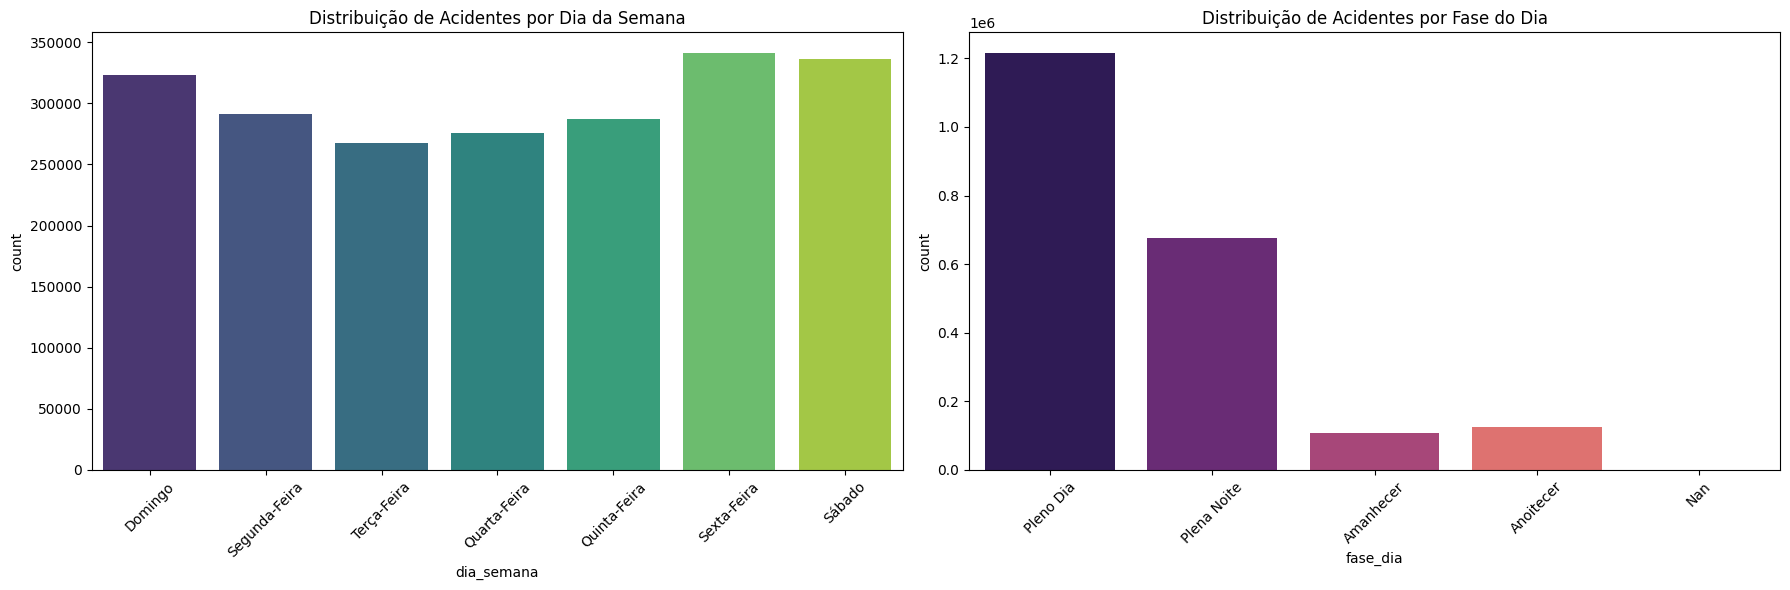

C:\Users\Vinícius\AppData\Local\Temp\ipykernel_16732\1382946753.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_severo, x='tipo_pista', y='mortos', palette='Reds')


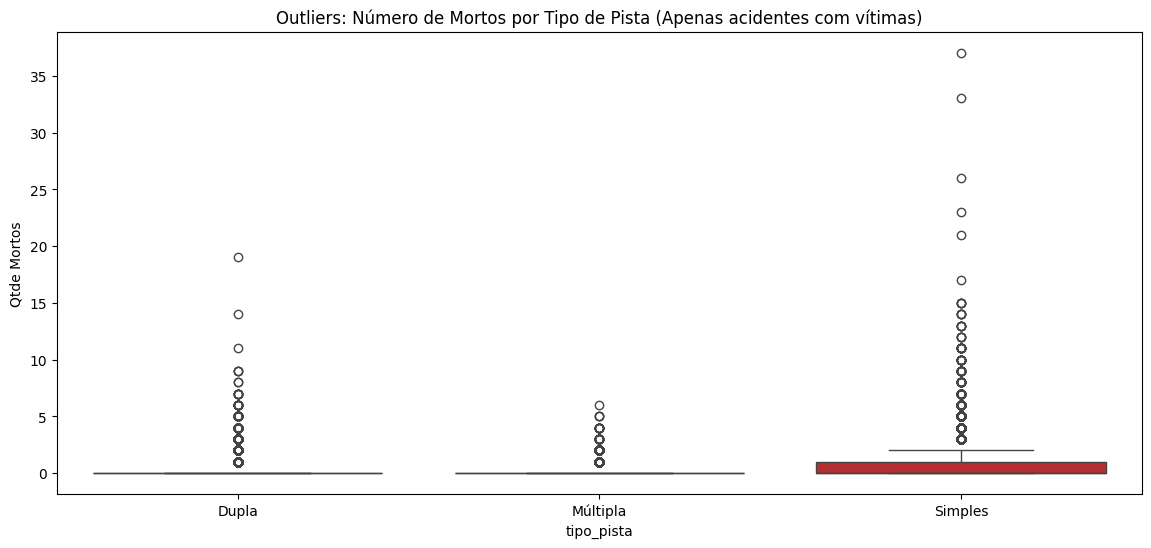

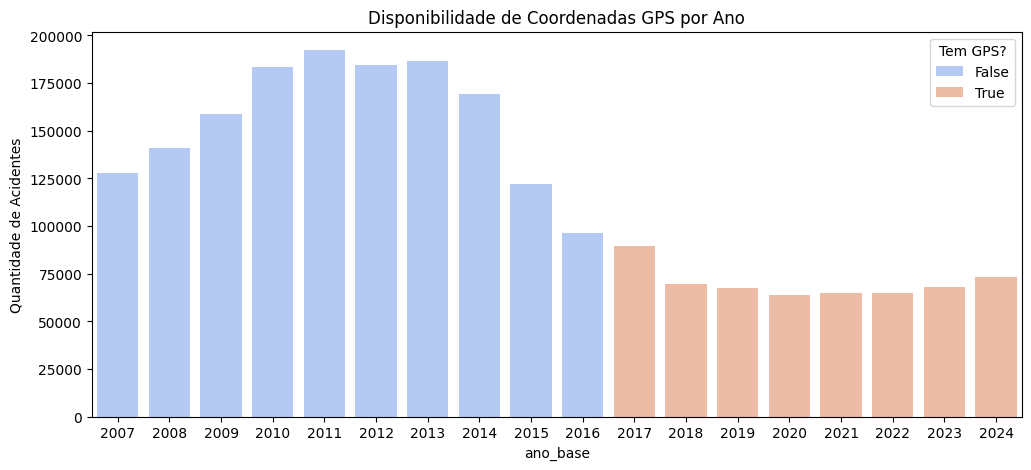

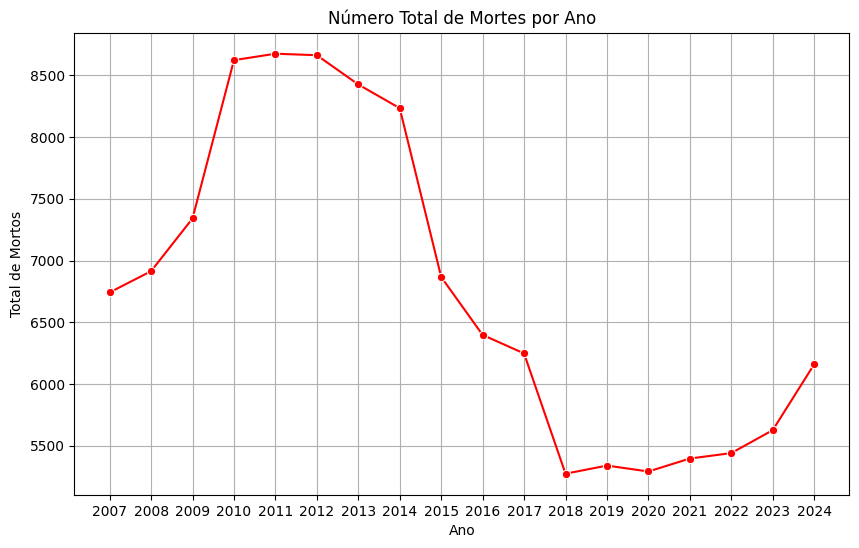

In [16]:
# Cell 11. Generating Exploratory Visualizations
plot_distribuicao_temporal(df_final)
plot_outliers_severidade(df_final)
plot_geo_missing(df_final)
plot_qtd_deaths_per_year(df_final)

C:\Users\Vinícius\AppData\Local\Temp\ipykernel_16732\2056030163.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem.values, y=contagem.index, palette='viridis', ax=ax1)
C:\Users\Vinícius\AppData\Local\Temp\ipykernel_16732\2056030163.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_let, x='Média Mortos (Com)', y='Fator', palette='Reds', ax=ax2)


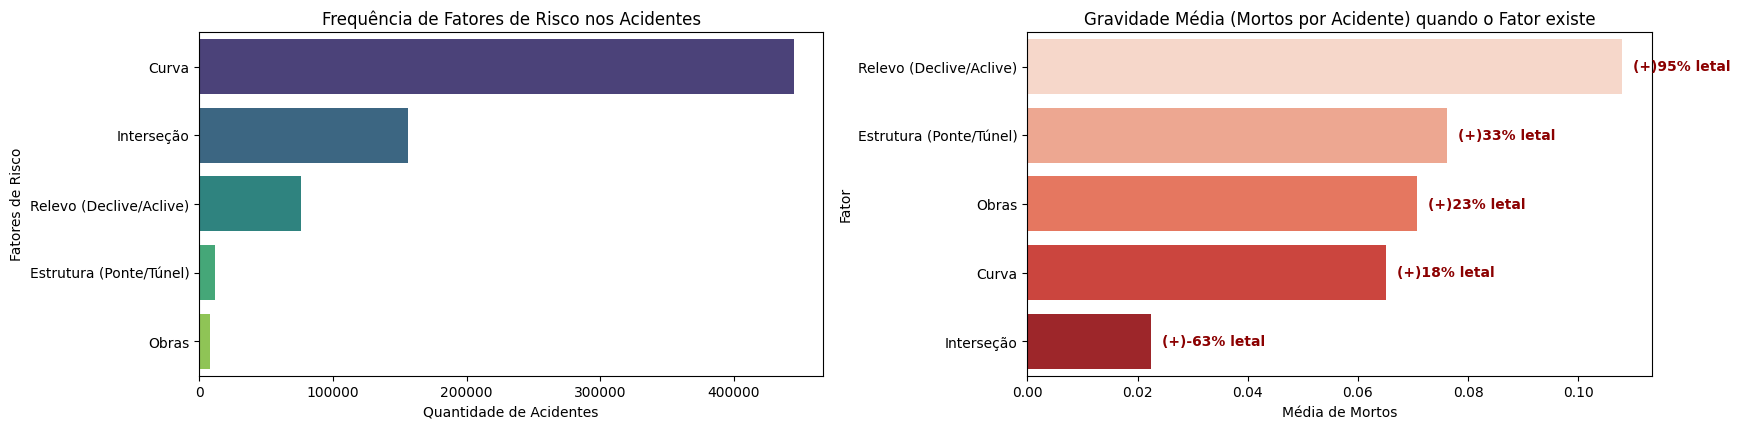

In [17]:
def analisar_features_risco(df):
    """
    Gera gráficos para validar as novas features de engenharia (tracado_via).
    Mostra a frequência e o impacto na severidade (letalidade).
    """
    # Configuração do visual
    fig = plt.figure(figsize=(25, 12))
    gs = fig.add_gridspec(3, 3)
    
    # Lista das flags binárias que criamos
    flags_risco = ['feat_curve', 'feat_relief', 'feat_structure', 'feat_intersection', 'feat_roadwork']
    nomes_legiveis = ['Curva', 'Relevo (Declive/Aclive)', 'Estrutura (Ponte/Túnel)', 'Interseção', 'Obras']
    
    # --- GRÁFICO 1: Contagem Total (Onde acontecem os acidentes?) ---
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Prepara dados para plotar (soma quantos '1' tem em cada coluna)
    contagem = df[flags_risco].sum().sort_values(ascending=False)
    contagem.index = [nomes_legiveis[flags_risco.index(c)] for c in contagem.index]
    
    sns.barplot(x=contagem.values, y=contagem.index, palette='viridis', ax=ax1)
    ax1.set_title('Frequência de Fatores de Risco nos Acidentes')
    ax1.set_xlabel('Quantidade de Acidentes')
    ax1.set_ylabel('Fatores de Risco')
    
    
	# --- GRÁFICO 2: Taxa de Mortalidade por Fator (O Risco Real) ---
    ax2 = fig.add_subplot(gs[0, 1])
    
    letalidade = []
    for flag, nome in zip(flags_risco, nomes_legiveis):
        # Calcula média de mortos quando o fator está presente vs ausente
        mortos_com = df[df[flag] == 1]['mortos'].mean()
        mortos_sem = df[df[flag] == 0]['mortos'].mean()
        # Aumento percentual do risco
        aumento = ((mortos_com - mortos_sem) / mortos_sem) * 100
        letalidade.append({'Fator': nome, 'Média Mortos (Com)': mortos_com, 'Média Mortos (Sem)': mortos_sem, 'Aumento Risco %': aumento})
    
    df_let = pd.DataFrame(letalidade).sort_values('Média Mortos (Com)', ascending=False)
    
    # Plotamos a média de mortos para quem TEM o fator
    sns.barplot(data=df_let, x='Média Mortos (Com)', y='Fator', palette='Reds', ax=ax2)
    ax2.set_title('Gravidade Média (Mortos por Acidente) quando o Fator existe')
    ax2.set_xlabel('Média de Mortos')
    
    # Adiciona anotação do aumento de risco
    for i, row in enumerate(df_let.itertuples()):
        ax2.text(row._2 + 0.002, i, f"(+){row._4:.0f}% letal", va='center', fontsize=10, color='darkred', fontweight='bold')
      
    plt.tight_layout()
    plt.show()
    
analisar_features_risco(df_final)

In [18]:
OUTPUT_PATH = "../data/df_final_processed.pkl"

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

print("\n* Saving final DataFrame...")
df_final.to_pickle(OUTPUT_PATH)

print(f"\n* File saved at: {OUTPUT_PATH}")


* Saving final DataFrame...

* File saved at: ../data/df_final_processed.pkl
